<a href="https://colab.research.google.com/github/Harbhajan-Kaur/final_project_Harbhajan_Kaur/blob/main/Kaggle_import.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle #install kaggle library

In [2]:
from google.colab import drive
drive.mount('/content/drive')   #connect to google drive

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle #directory name kaggle

In [4]:
!cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/  #copy token to kaggle(dir)

cp: cannot stat '/content/drive/MyDrive/Kaggle_API/kaggle.json': No such file or directory


In [5]:
! chmod 600 ~/.kaggle/kaggle.json #only owner has read and write permission

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
! kaggle datasets download akashshingha850/mrl-eye-dataset


Dataset URL: https://www.kaggle.com/datasets/akashshingha850/mrl-eye-dataset
License(s): MIT
 99% 327M/329M [00:17<00:00, 22.8MB/s]
100% 329M/329M [00:17<00:00, 19.6MB/s]


In [7]:
! unzip mrl-eye-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/val/sleepy/s0013_02688_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02689_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02692_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02693_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02694_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02700_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02710_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02713_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02716_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02726_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02728_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02738_0_1_0_1_0_01.png  
  inflating: data/val/sleepy/s0013_02748_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02755_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02778_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02806_0_1_0_0_

In [8]:
# Define paths
train_dir = "/content/data/train"
val_dir = "/content/data/val"
test_dir = "/content/data/test"

In [10]:
import os #directory operations
import numpy as np #array and matrices
import matplotlib.pyplot as plt #visualization
import tensorflow as tf #lib to build newral networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator #agumentation(fliping,rotating the images)
from tensorflow.keras.models import Sequential # stack of layers where each layer has one input and output
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout #cnn related
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint #earlystoping-stoping training if improvement not made,.............

In [37]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, #rescale pixels from 0to 1
    rotation_range=20, #rotate image to 20 degree
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'    #agumentaion is only applied to training dataset whereas and rescaling is done in both traing and test dataset
)

val_datagen = ImageDataGenerator(rescale=1./255)     #same pixel size
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  #resize all the images in
    batch_size=32,  #loads images in batches of 32..memory efficency
    class_mode='categorical'     #binary classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 50937 images belonging to 2 classes.
Found 16980 images belonging to 2 classes.
Found 16981 images belonging to 2 classes.


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter #counts occurance

# Function to plot class distribution
def plot_class_distribution(generator, title): #generator-dataset
    labels = generator.classes                                                           #extract classes
    class_counts = Counter(labels)
    class_names = list(generator.class_indices.keys()) #dictionary ki keys

    plt.figure(figsize=(8, 4))
    sns.barplot(x=class_names, y=[class_counts[i] for i in range(len(class_names))])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

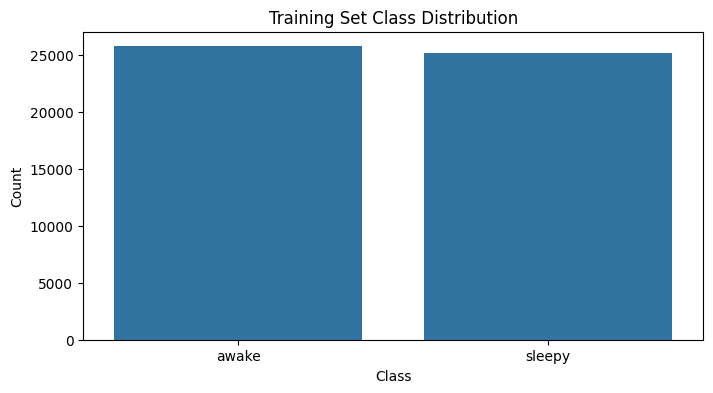

In [39]:
# Plot class distribution for train set
plot_class_distribution(train_generator, 'Training Set Class Distribution')

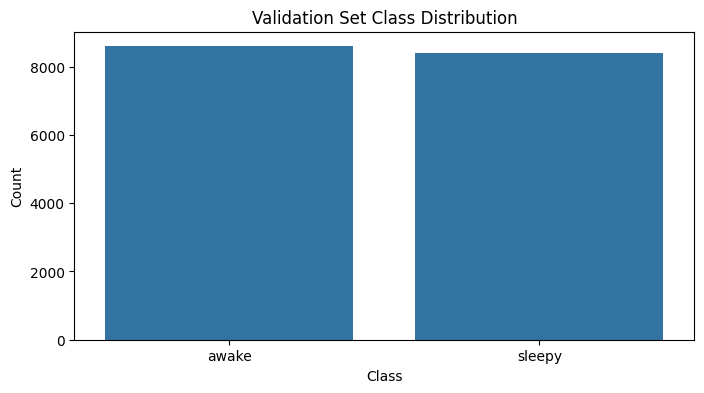

In [40]:
# Plot class distribution for val set
plot_class_distribution(val_generator, 'Validation Set Class Distribution')

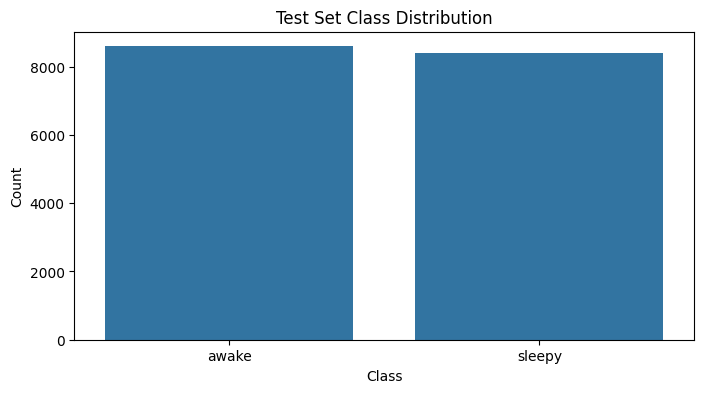

In [41]:
# Plot class distribution for test set
plot_class_distribution(test_generator, 'Test Set Class Distribution')

In [42]:
import cv2

In [43]:
img_array=cv2.imread("/content/data/train/awake/s0001_01842_0_0_1_0_0_01.png",cv2.IMREAD_GRAYSCALE)


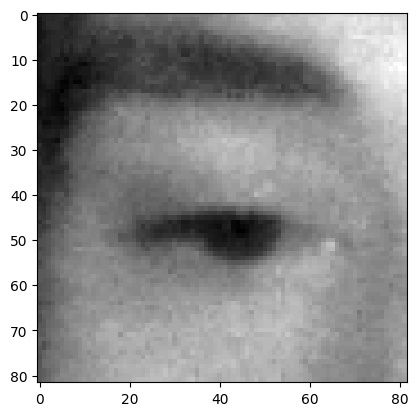

In [44]:

plt.imshow(img_array,cmap="gray")

In [45]:
img_array=cv2.imread("/content/data/train/sleepy/s0001_00002_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)


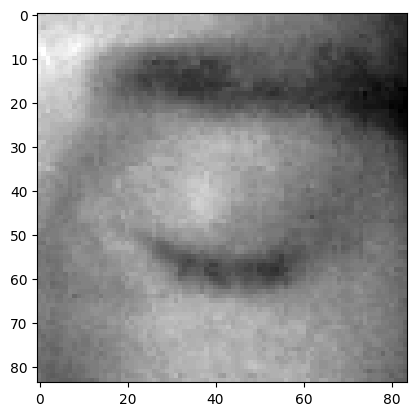

In [46]:
plt.imshow(img_array,cmap="gray")

In [50]:
# Function to plot sample images
def plot_sample_images(generator, title): #batch of images,title for image
    images, labels = next(generator)
    class_names = list(generator.class_indices.keys())

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1) #images placement                     #images with class name
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

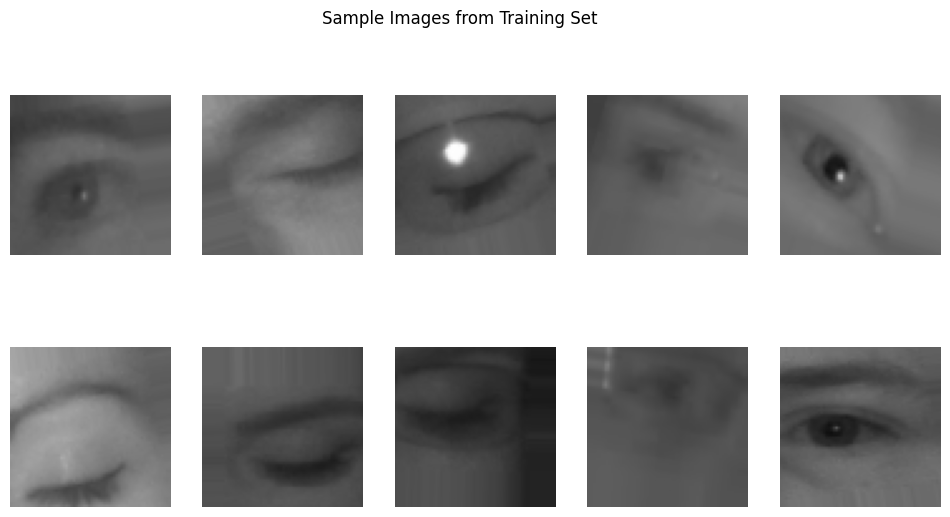

In [51]:
# Plot sample images from train set
plot_sample_images(train_generator, 'Sample Images from Training Set')

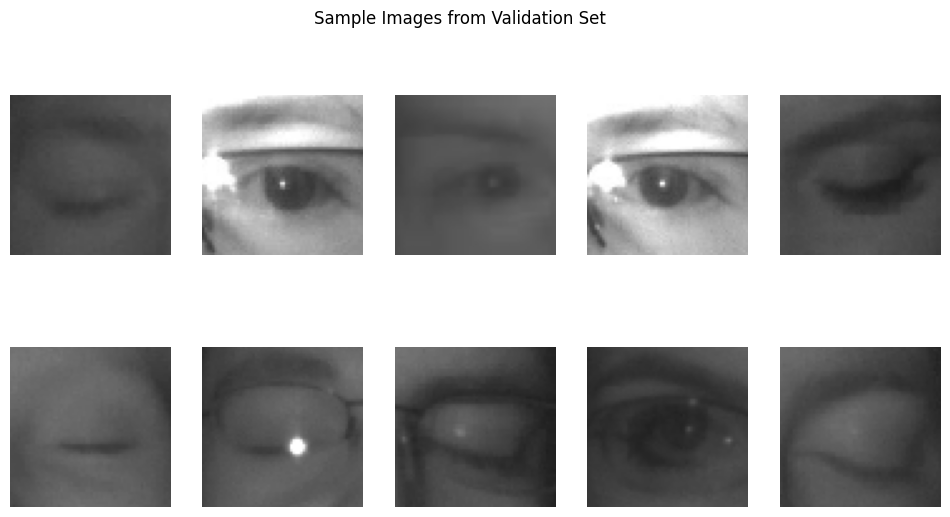

In [52]:
# Plot sample images from  val set
plot_sample_images(val_generator, 'Sample Images from Validation Set')

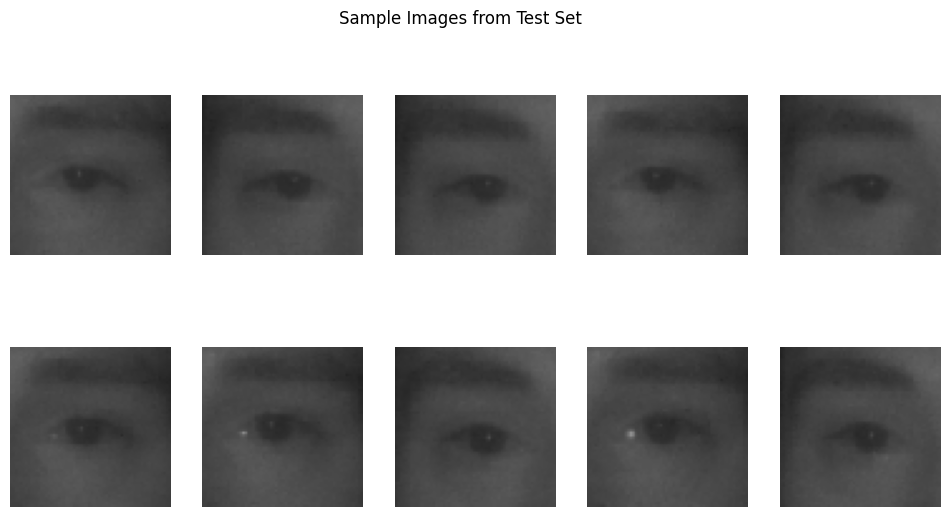

In [53]:
# Plot sample images from test set
plot_sample_images(test_generator, 'Sample Images from Test Set')

In [27]:
# Check image dimensions
print(f"Image shape: {train_generator.image_shape}")

Image shape: (64, 64, 3)


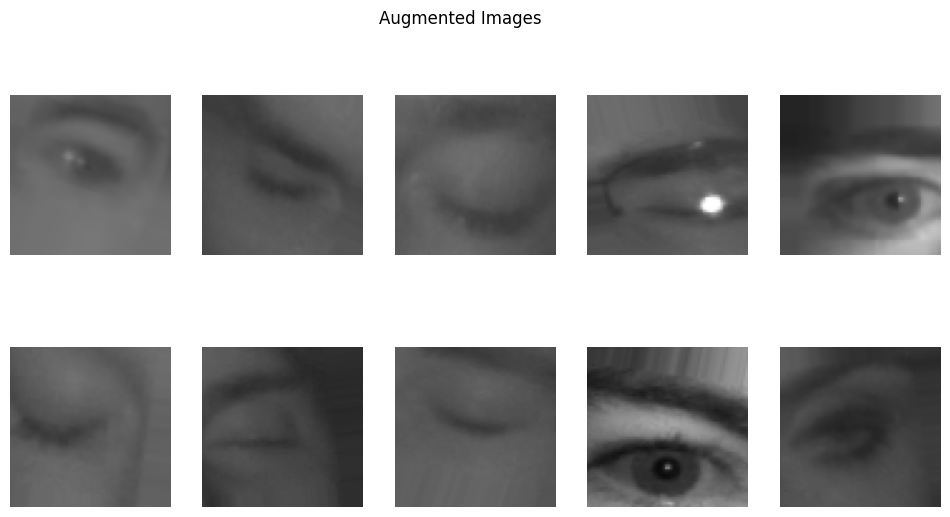

In [28]:
# Visualize data augmentation effects
augmented_images, _ = next(train_generator)
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle('Augmented Images')
plt.show()

In [29]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [30]:
#transfer learning-InceptionV3
base_model = InceptionV3(include_top=False, weights= 'imagenet', input_tensor=Input(shape=(64,64,3)))
head_model = base_model.output
head_model = Flatten()(head_model)
head_model = Dense(64, activation='relu')(head_model)
head_model = Dropout(0.5)(head_model)
head_model = Dense(2,activation= 'softmax')(head_model)

model = Model(inputs=base_model.input, outputs= head_model)
for layer in base_model.layers:
  layer.trainable =False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [31]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 64, 64, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 31, 31, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 31, 31, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 31, 31, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 29, 29, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 29, 29, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 29, 29, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 29, 29, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 29, 29, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 29, 29, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 14, 14, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 14, 14, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 14, 14, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 14, 14, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 12, 12, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 12, 12, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,802,978 (83.17 MB)

 Trainable params: 194 (776.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [33]:


# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)
learning_rate = ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=3)

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
model.fit(
train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint])

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 64, 64, 3))
  warnings.warn(msg)


ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 3 from 2 for '{{node functional_1/conv2d_75_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true](functional_1/activation_74_1/Relu, functional_1/conv2d_75_1/convolution/ReadVariableOp)' with input shapes: [?,2,2,192], [3,3,192,192].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(None, 2, 2, 192), dtype=float32)

In [36]:
import tensorflow as tf
print(tf.__version__)


2.18.0
